# Image Classification

In [1]:
# Import
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [3]:
path = Path('../dataset/13321_2017_226_MOESM1_ESM/')
df = pd.read_csv(path/'CHEMBL205_cl.csv')

# Generate images

In [4]:
DATA = path/'mol_images'
DATA.mkdir(exist_ok=True)

In [5]:
df.head()

,CID,SMILES,Activity
0,CHEMBL188002,S(=O)(=O)(N)c1cc(N/C(/S)=N\c2cc(C(=O)[O-])c(cc...,1
1,CHEMBL364127,Clc1ccc(cc1)C(=O)NC1Cc2cc(S(=O)(=O)N)ccc2C1,1
2,CHEMBL1683469,S(=O)(=O)(N)c1ccc(cc1)CNS(=O)(=O)CC12CCC(CC1=O...,1
3,CHEMBL52564,Oc1ccccc1\C=C\C(=O)[O-],1
4,CHEMBL21427,OB(O)c1ccc(OC)cc1,1


In [6]:
# Iterate all rows in the dataframe and create images
for i, r in df.iterrows():
    cid = r.CID
    smile = r.SMILES
    mol = Chem.MolFromSmiles(smile)
    Chem.Draw.MolToFile(mol, DATA/f'{cid}.png', size = (300, 300), imageType='png')

In [7]:
images = list(DATA.glob('*.png'))

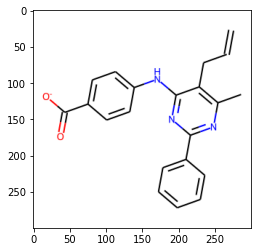

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(images[0])
imgplot = plt.imshow(img)
plt.show()